In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.mlab as mlab
%matplotlib inline
plt.rcParams['agg.path.chunksize'] = 10000

In [77]:
def plot_hist(array,bin_num):
    n, bins, patches = plt.hist(array,bins=bin_num)
    plt.close()
    return bins, n

In [80]:
def make_graphs(file_str, nbins, title_str = None, save_str = 'images/null', x_lim = None):
    array = np.load(file_str)
    print(array.shape)
    bins, n = plot_hist([row[1] for row in array],nbins)
      
   
    step = 0.5*(bins[1]-bins[0])

    plt.figure(figsize=(20,10))
    plt.plot(bins[:-1]+step, n)
    plt.xlabel('Distance (arcminutes)')
    plt.ylabel('Frequency')
    plt.title(title_str)
    plt.xlim(0,x_lim)
    plt.savefig(save_str)

(590093, 7)


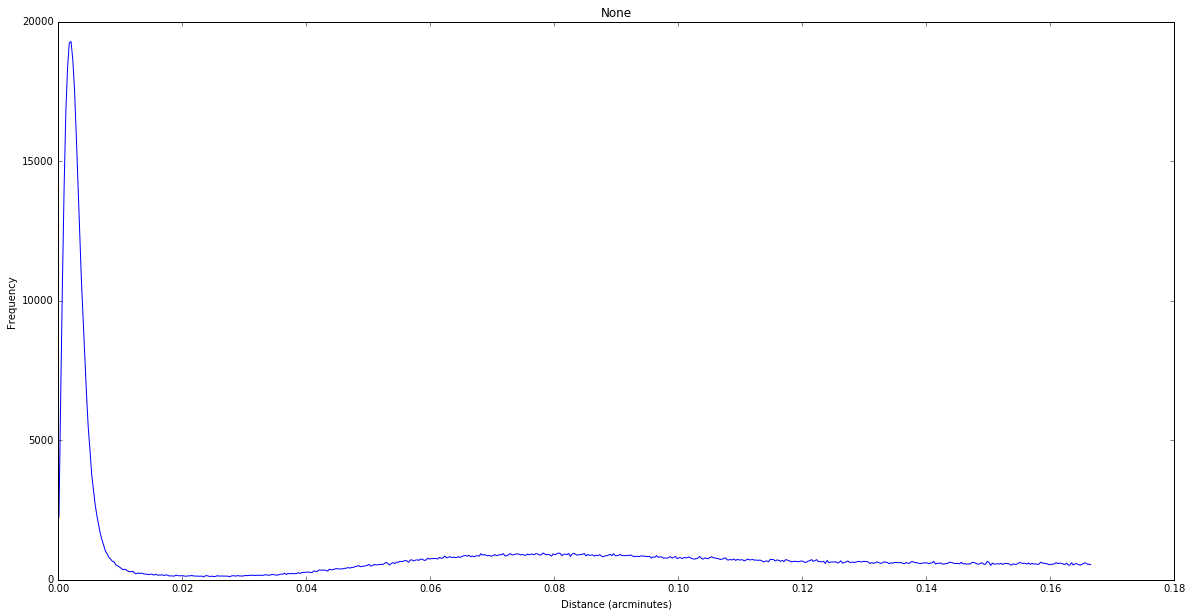

In [86]:
make_graphs('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_all_sdss.npy',600)

(268466, 7)


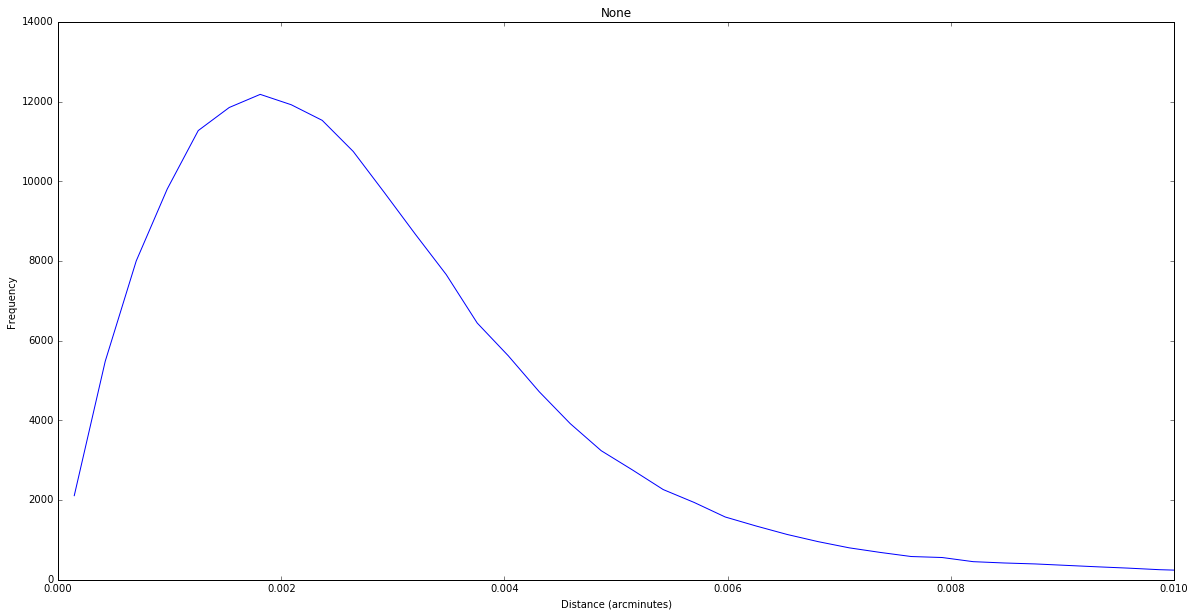

In [88]:
make_graphs('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_nearest_sdss.npy',600, x_lim=0.01)

(159385, 7)


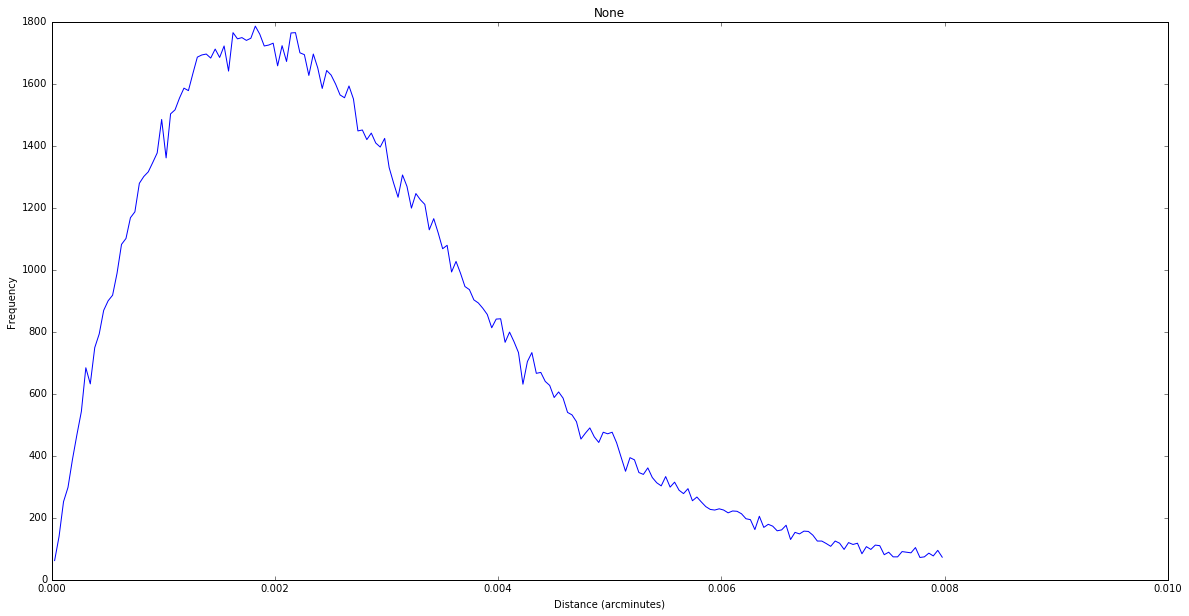

In [92]:
make_graphs('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_large_sdss.npy',200, x_lim=0.01)

(129586, 7)


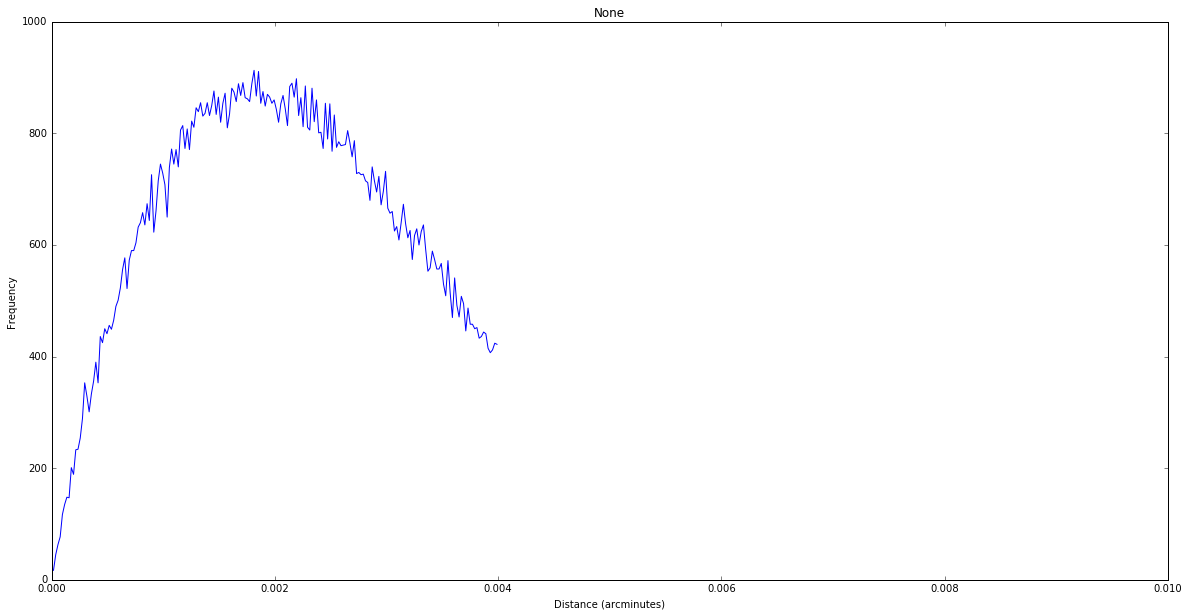

In [93]:
make_graphs('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_small_sdss.npy',200, x_lim=0.01)